# The Importance of Hand Washing 

This notebook is based on a project on DataCamp . It examines the data used by a Hungarian physisian Dr. Ignaz Semmelweis in 1840s to prove that handwashing was important and it led to a lower child-mortality at birth. 

**Initial background information**

Yearly data from two clinics in Vienna where babies were born. We also have monthly data for clinic 1.

* **Clinic 1** had medical students working there who also spent some time examining corpses and performing autopsies. 
* **Clinic 2** had mainly mid-wives working there

Nobody was washing their hands until it was introduced at clinic 1 on 1 June 1847.

## Objective

1. Visually examine the number of births and deaths at the two clinics. 
2. Prove if the introduction of handwashing at clinic 1 had a statistically significant impact on reducing child mortality. 

## 1. Exploratory data analysis

In [98]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime

In [34]:
# import the data 
yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')
monthly = pd.read_csv('datasets/monthly_deaths.csv')

In [35]:
# print some initial stats about the data 
display(yearly.head())
display(yearly.info())
# display(yearly.describe())
display(monthly.head())
display(monthly.info())
# display(monthly.describe())

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


None

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


None

### Comparing clinics overall 

In [36]:
# calculate some quick comparison statistics 
clinics = yearly.groupby('clinic').agg({'births':'sum', 'deaths':'sum'})
clinics['mortality'] = clinics['deaths'] / clinics['births']
clinics

,births,deaths,mortality
clinic,,,
clinic 1,20042,1989,0.099242
clinic 2,17791,691,0.038840


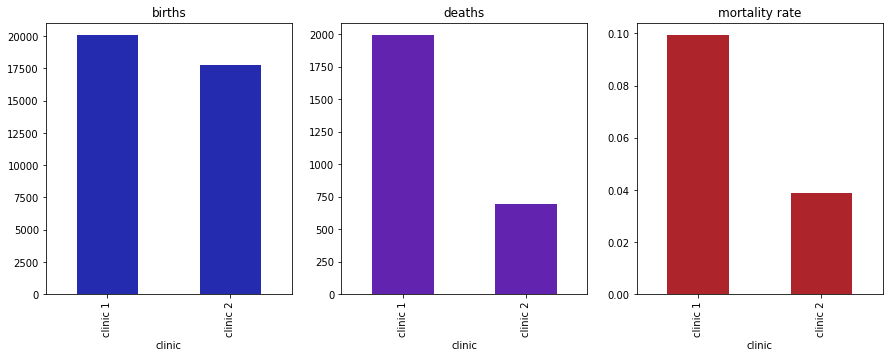

In [37]:
# create a plt grid
fix, axs = plt.subplots(1, 3, figsize=(15,5))

# plot some key totals between clinics
_ = clinics['births'].plot.bar(ax=axs[0], title='births', color='#242BAE')
_ = clinics['deaths'].plot.bar(ax=axs[1], title='deaths', color='#6224AE')
_ = clinics['mortality'].plot.bar(ax=axs[2], title='mortality rate', color='#AE242B')

While the number total number of births between clinics is very similar, there are far fewer deaths occuring at clinic 2. Consequently, the mortality rate at clinic 2 is about 2/3 lower than at clinic 1. 

### Mortality rate between clinics over the years

In [38]:
# calculate the mortality rate by year
yearly['mortality'] = yearly['deaths'] / yearly['births']
yearly.head()

,year,births,deaths,clinic,mortality
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015


In [65]:
# calculate the difference in mortality rates between clinics 
clinic_1 = yearly[yearly['clinic'] == 'clinic 1'].set_index('year')
clinic_2 = yearly[yearly['clinic'] == 'clinic 2'].set_index('year')
difference = clinic_1['mortality'] - clinic_2['mortality']

year
1841    0.042846
1842    0.081622
1843    0.029667
1844    0.059353
1845    0.048651
1846    0.086494
Name: mortality, dtype: float64

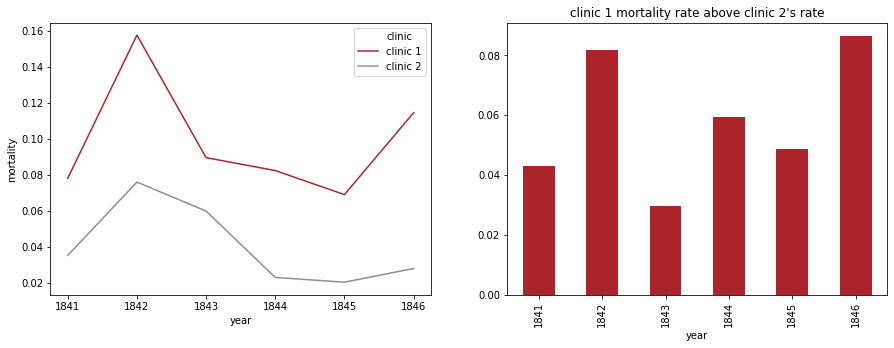

In [69]:
# create a plt grid
fix, axs = plt.subplots(1, 2, figsize=(15,5))

# plot the moratlity rate over time and the difference in mortality 
_ = sns.lineplot(data=yearly, x='year', y='mortality', hue='clinic', palette=['#AE242B', '#8E8E8E'], ax=axs[0])
_ = difference.plot.bar(ax=axs[1], color='#AE242B', title='clinic 1 mortality rate above clinic 2\'s rate')

In [71]:
# find out the worst year for clinic 1
worst_year_c1 = yearly[yearly['clinic'] == 'clinic 1'].nlargest(1, columns=['mortality'])
int(worst_year_c1['year'])
print ('The worst year for clinic 1 was {} when the mortality rate was {:.1%}'
       .format(int(worst_year_c1['year']), float(worst_year_c1['mortality']) ))

The worst year for clinic 1 was 1842 when the mortality rate was 15.8%


## 2. The impact of handwashing 

In [129]:
# set the date when they started washing hands at clinic 1
started_on = datetime.date(1847, 6, 1)
# monthly[monthly['date'] == str(started_on)].index[0]

76

Text(0.5, 1.0, 'Mortality rate at clinic 1')

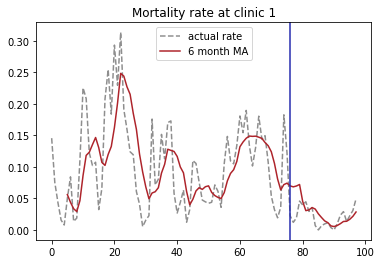

In [139]:
# convert date to datetime
monthly['date'] = pd.to_datetime(monthly['date'])

# calculate mortality at clinic 1
monthly['mortality'] = monthly['deaths'] / monthly['births']

# calculate 3-month rolling average 
monthly['mortality_ma_6_months'] = monthly['deaths'].rolling(6).sum() / monthly['births'].rolling(6).sum()
monthly

# plot 
# _ = monthly.plot(x='date', y='mortality', color='#8E8E8E', style='--', label='actual rate')
# _ = monthly.plot(x='date', y='mortality_ma_6_months', color='#AE242B', label='6 month moving average')
_ = monthly['mortality'].plot(color='#8E8E8E', style='--', label='actual rate')
_ = monthly['mortality_ma_6_months'].plot(color='#AE242B', label='6 month MA')

# plot a vertical line for when they started to wash hands 
x_line = monthly[monthly['date'] == str(started_on)].index[0]
plt.axvline(x=x_line, color='#242BAE')

# finish up 
plt.legend()
plt.title('Mortality rate at clinic 1')

It's very obvious that the moment they started to wash hands, the death rate at clinic 1 decreased rapidly. 

## 3. Measuring the significance of the decrease in mortality 

In [144]:
# calculate the mean mortality rates before and after handwashing 
before = monthly[monthly['date'] < str(started_on)]
after = monthly[monthly['date'] >= str(started_on)]

print('The mean mortality rate before handwashing was {:.1%} and after it was {:.1%}'
      .format(before['mortality'].mean(), after['mortality'].mean()))


The mean mortality rate before handwashing was 10.5% and after it was 2.1%


In [160]:
# examine how robust this difference in means is with bootstrap sampling 
bs_means = []
for i in range(5000):
    bs_mean_before = before['mortality'].sample(frac=1, replace=True).mean()
    bs_mean_after = after['mortality'].sample(frac=1, replace=True).mean()
    bs_means.append([bs_mean_before, bs_mean_after])

In [161]:
# turn the bootstrapped statistics into a DataFrame for easier plotting
bs_means_df = pd.DataFrame(data=bs_means, columns=['before','after'])

# calculate the difference in means 
bs_means_df['diff'] = bs_means_df['after'] - bs_means_df['before']

Text(0.5, 0, 'mortality rate')

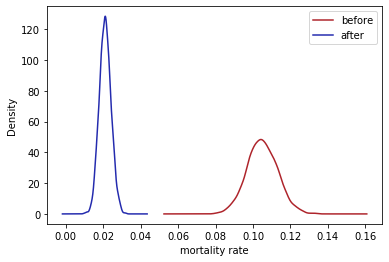

In [170]:
# plot kde 
bs_means_df[['before','after']].plot.kde(color=['#AE242B','#242BAE'])
plt.xlabel('mortality rate')

In [166]:
# calculate the 95% CI for the difference in means
# ci = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
ci = bs_means_df['diff'].quantile([0.025, 0.975])
display(ci)

0.025   -0.101336
0.975   -0.066919
Name: diff, dtype: float64

The is no doubt that the introduction of handwashing had a positive impact on reducing child mortality at clinic 1. With 5,000 bootstrapped samples we can say with 95% certainty that the mean reduction in mortality rates was between 6.7% and 10.1% (percentage points). 